<a href="https://colab.research.google.com/github/josep29/josep29/blob/main/Flowers_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudi d'algorismes de classificació

Activitat realitzada per:

* Josep Picanyol

En aquesta activitat, adjunta al projecte TDR, és per veure com funcionen els diferents models de classifiació, així veient amb el tipus de dades que tenim, quin és el tipus de model que millor s'adapta.

Podem veure que per aquest programa s'utilitzarà una llibreria de fotografies de flors, simulant els elements d'una vida quotidiana.

El dataset de imatges es pot descarregar aquí:

[flower_photos](https://rserve.dataverse.harvard.edu/cgi-bin/zipdownload?7ba-7d4b030141c1) (~800Mb)

Programa creat amb l'ajuda del tutorial de tensorflow de algorismes de classificació.

In [ ]:
# @data{DVN/1ECTVN_2020,
# author = {Tung, K},
# publisher = {Harvard Dataverse},
# title = {{Flowers Dataset}},
# UNF = {UNF:6:z6JGwpi2tftxFU+tbVH/3g==},
# year = {2020},
# version = {V8},
# doi = {10.7910/DVN/1ECTVN},
# url = {https://doi.org/10.7910/DVN/1ECTVN}
# }


## Importació de llibreries utilitzades en el programa:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import PIL 
import pathlib 
import random
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets
from tensorflow.keras.models import Sequential 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Importació i localització de les dades

In [ ]:
!mkdir zipfiles

In [ ]:
!unzip gdrive/My\ Drive/Colab_Notebooks/Data/dataverse_files.zip -d zipfiles/

unzip:  cannot find or open gdrive/My Drive/Colab_Notebooks/Data/dataverse_files.zip, gdrive/My Drive/Colab_Notebooks/Data/dataverse_files.zip.zip or gdrive/My Drive/Colab_Notebooks/Data/dataverse_files.zip.ZIP.


In [ ]:
!unzip  /content/zipfiles/flowers.zip

unzip:  cannot find or open /content/zipfiles/flowers.zip, /content/zipfiles/flowers.zip.zip or /content/zipfiles/flowers.zip.ZIP.


In [ ]:
!mv /content/flowers/flower_photos/test /content/flowers/flower_photos/train /content/flowers/flower_photos/validation -t /content/
!rm -rf zipfiles/ __MACOSX/ flowers/ sample_data/ flower_photos/

mv: cannot stat '/content/flowers/flower_photos/test': No such file or directory
mv: cannot stat '/content/flowers/flower_photos/train': No such file or directory
mv: cannot stat '/content/flowers/flower_photos/validation': No such file or directory


In [ ]:
!unzip gdrive/My\ Drive/Colab_Notebooks/Data/flower_photos.zip 

Archive:  gdrive/My Drive/Colab_Notebooks/Data/flower_photos.zip
   creating: flower_photos/
   creating: flower_photos/sunflowers/
  inflating: flower_photos/sunflowers/18237156988_9ceb46a8de_n.jpg  
  inflating: flower_photos/sunflowers/19508264965_d1dfb565ea_n.jpg  
  inflating: flower_photos/sunflowers/7820523050_76c8caa025.jpg  
  inflating: flower_photos/sunflowers/9213511121_836a458021_m.jpg  
  inflating: flower_photos/sunflowers/6606820461_952c450f90_n.jpg  
  inflating: flower_photos/sunflowers/4746668678_0e2693b1b9_n.jpg  
  inflating: flower_photos/sunflowers/9558627290_353a14ba0b_m.jpg  
  inflating: flower_photos/sunflowers/3784815653_5df39aa9c2_m.jpg  
  inflating: flower_photos/sunflowers/7176736574_14446539cb_n.jpg  
  inflating: flower_photos/sunflowers/2067882323_8de6623ffd.jpg  
  inflating: flower_photos/sunflowers/8174935013_b16626b49b.jpg  
  inflating: flower_photos/sunflowers/13096076565_72c2c60875_n.jpg  
  inflating: flower_photos/sunflowers/20965412955_2c640

a

In [ ]:
!cp -av /content/flower_photos/ /content/flower_photos1/

os.mkdir('/content/flower_photos1/daisy1/')
os.mkdir('/content/flower_photos1/dandelion1/')
os.mkdir('/content/flower_photos1/roses1/')
os.mkdir('/content/flower_photos1/sunflowers1/')
os.mkdir('/content/flower_photos1/tulips1/')

!mv /content/flower_photos1/daisy/ -t /content/flower_photos1/daisy1/
!mv /content/flower_photos1/dandelion/ -t /content/flower_photos1/dandelion1/
!mv /content/flower_photos1/roses/ -t /content/flower_photos1/roses1/
!mv /content/flower_photos1/sunflowers/ -t /content/flower_photos1/sunflowers1/
!mv /content/flower_photos1/tulips/ -t /content/flower_photos1/tulips1/

In [ ]:
# !mv /content/flower_photos -t /root/.keras/

Modifica

In [ ]:
# data_dir = '/root/.keras/flower_photos/'
data_dir = '/content/flower_photos/'
data_dir = pathlib.Path(data_dir)
data_count = len(os.listdir(data_dir))

train_dir = '/content/train/'
train_dir = pathlib.Path(train_dir)
test_dir = '/content/test/'
test_dir = pathlib.Path(test_dir)
val_dir = '/content/validation/'
val_dir = pathlib.Path(val_dir)

daisy_dir = '/content/flower_photos1/daisy1'
daisy_dir = pathlib.Path(daisy_dir)
dandelion_dir = '/content/flower_photos1/dandelion1'
dandelion_dir = pathlib.Path(dandelion_dir)
roses_dir = '/content/flower_photos1/roses1'
roses_dir = pathlib.Path(roses_dir)
sunflowers_dir = '/content/flower_photos1/sunflowers1'
sunflowers_dir = pathlib.Path(sunflowers_dir)
tulips_dir = '/content/flower_photos1/tulips1'
tulips_dir = pathlib.Path(tulips_dir)

## Modificació de Dades


In [ ]:
class GetData:
  def __init__(self, type, dir, print=True, n=random.randrange(0,633)):
    self.type = type
    self.dir = dir
    self.Data = list(self.dir.glob(type))
    self.n = n
    self.print = print
  
  def printData(self):
    if self.print == True:
      print(f"L'indicador de la foto és: {self.n}")
      return PIL.Image.open(str(self.Data[self.n]))
    else:
      return PIL.Image.open(str(self.Data[self.n]))

  def resizeData(self):
    finalsize = 64
    if self.type == 'daisy/*':
      t = 633
      print(f'{t} daisy fotos used')
    elif self.type == 'dandelion/*':
      t = 898
      print(f'{t} dandelion fotos used')
    elif self.type == 'roses/*':
      t = 641
      print(f'{t} roses fotos used')
    elif self.type == 'sunflowers/*':
      t = 699
      print(f'{t} sunflowers fotos used')
    elif self.type == 'tulips/*':
      t = 799
      print(f'{t} tulips fotos used')

    for x in range(t):
      img = GetData(self.type, self.dir, n=x, print=False).printData()
      wpercent = (float(img.size[0])/finalsize)
      hpercent = (float(img.size[1])/finalsize)
      wsize = int((float(img.size[0])/float(wpercent)))
      hsize = int((float(img.size[1])/float(hpercent)))
      img = img.resize((wsize,hsize), PIL.Image.ANTIALIAS)
      img.save(str(self.Data[x]))

  def data_augmentation(self):
    if self.type == 'daisy/*':
      t = 633
      print(f'{t} daisy fotos used')
    elif self.type == 'dandelion/*':
      t = 898
      print(f'{t} dandelion fotos used')
    elif self.type == 'roses/*':
      t = 641
      print(f'{t} roses fotos used')
    elif self.type == 'sunflowers/*':
      t = 699
      print(f'{t} sunflowers fotos used')
    elif self.type == 'tulips/*':
      t = 799
      print(f'{t} tulips fotos used')

    for x in range(t):
      a = str(self.Data[x])
      l = []
      for y in a:
        if y == '.':
          l.append('1.jpg')
          break
        l.append(y)

      n=random.randrange(-30,30)
      img = GetData(self.type, self.dir, n=x, print=False).printData()
      img = img.rotate(n)
      img.save(''.join(l))

    

In [ ]:
GetData('daisy/*', data_dir).resizeData()
GetData('dandelion/*', data_dir).resizeData()
GetData('roses/*', data_dir).resizeData()
GetData('sunflowers/*', data_dir).resizeData()
GetData('tulips/*', data_dir).resizeData()

633 daisy fotos used
898 dandelion fotos used
641 roses fotos used
699 sunflowers fotos used
799 tulips fotos used


In [ ]:
GetData('daisy/*', data_dir).data_augmentation()
GetData('dandelion/*', data_dir).data_augmentation()
GetData('roses/*', data_dir).data_augmentation()
GetData('sunflowers/*', data_dir).data_augmentation()
GetData('tulips/*', data_dir).data_augmentation()

633 daisy fotos used
898 dandelion fotos used
641 roses fotos used
699 sunflowers fotos used
799 tulips fotos used


In [ ]:
def data_count(dir):
  count = len(list(dir.glob('*/*.jpg')))
  return count

daisy_count = data_count(daisy_dir)
dandelion_count = data_count(dandelion_dir)
roses_count = data_count(roses_dir)
sunflowers_count = data_count(sunflowers_dir)
tulips_count = data_count(tulips_dir)
data_count = data_count(data_dir)

## Anàlisis de Dades

In [ ]:
print(f'El total de les dades és de {data_count}')
print(f'El total de les dades daisy és de {daisy_count}')
print(f'El total de les dades dandelion és de {dandelion_count}')
print(f'El total de les dades roses és de {roses_count}')
print(f'El total de les dades sunflowers és de {sunflowers_count}')
print(f'El total de les dades tulips és de {tulips_count}')
print(f'Images recreades: {data_count-(daisy_count+dandelion_count+roses_count+sunflowers_count+tulips_count)}')

El total de les dades és de 9306
El total de les dades daisy és de 633
El total de les dades dandelion és de 898
El total de les dades roses és de 641
El total de les dades sunflowers és de 699
El total de les dades tulips és de 799
Images recreades: 5636


L'indicador de la foto és: 512


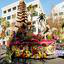

In [ ]:
roses_train = GetData('roses/*', data_dir).Data
GetData('roses/*', data_dir).printData()

L'indicador de la foto és: 512


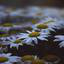

In [ ]:
daisy = GetData('daisy/*', data_dir).Data
GetData('daisy/*', data_dir).printData()

L'indicador de la foto és: 512


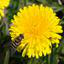

In [ ]:
dandelion = GetData('dandelion/*', data_dir).Data
GetData('dandelion/*', data_dir).printData()

L'indicador de la foto és: 512


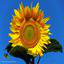

In [ ]:
sunflowers = GetData('sunflowers/*', data_dir).Data
GetData('sunflowers/*', data_dir).printData()

L'indicador de la foto és: 512


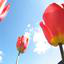

In [ ]:
tulips = GetData('tulips/*', data_dir).Data
GetData('tulips/*', data_dir).printData()

## Càrrega de Dades utilitzan Keras

### Creació del Dataset

In [ ]:
batch_size=32
img_size=(64, 64)

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory( # es defineix una classe que hi han les imatges per fer entrenament (80% de les imatges)
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory( # es defineix una classe que hi han unes altre imatges per validar (20% de  les imatges)
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


### Configuració del Dataset per ser aplicat

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE 

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Estandardització les Dades

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


## Model inicial

In [ ]:
model = Sequential([
  layers.Rescaling(1./255), # Fa un reascalament de les dades introduides, en aquest cas es pasen a escala 1 / 255
  layers.BatchNormalization(), # Normalitza les entrades dels lots en capes per als lots més petits --> https://developers.google.com/machine-learning/glossary#batch_normalization / https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization
  layers.Conv2D(32, 3, padding='same', activation='relu'), # Simplifica la imatge, extreient les features, es fa aquest procés 32 vegades, 
  layers.MaxPooling2D(), # Redueix la imatge
  layers.Conv2D(64, 3, padding='same', activation='relu'), # Simplifica la imatge, extreient les features, es fa aquest procés 64 vegades, 
  layers.MaxPooling2D(), # Redueix la imatge
  layers.Conv2D(128, 3, padding='same', activation='relu'), # Simplifica la imatge, extreient les features, es fa aquest procés 128 vegades, 
  layers.MaxPooling2D(), # Redueix la imatge
  layers.Dropout(0.2), # Una manera útil de regular l'entrenament, treu un número aleatori de unitats en l'entrenament --> https://developers.google.com/machine-learning/glossary#dropout_regularization / https://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf
  layers.Flatten(), # Normalitza les entrades per la xarxa --> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten
  layers.Dense(128, activation='relu'), # "Desglosen" la informació important --> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
  layers.Dense(128, activation='relu'), # "Desglosen" la informació important --> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
  layers.Dense(5) # Classifica la informació.  --> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
])

### Compilació del Model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Extracte del Model

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 3)        12        
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)      

### Entrenament del Model

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
92/92 [==============================] - 6s 52ms/step - loss: 1.2854 - accuracy: 0.4475 - val_loss: 1.2918 - val_accuracy: 0.5504
Epoch 2/10
92/92 [==============================] - 4s 40ms/step - loss: 1.0339 - accuracy: 0.5845 - val_loss: 1.0575 - val_accuracy: 0.5926
Epoch 3/10
92/92 [==============================] - 5s 49ms/step - loss: 0.9141 - accuracy: 0.6376 - val_loss: 0.9094 - val_accuracy: 0.6526
Epoch 4/10
92/92 [==============================] - 4s 33ms/step - loss: 0.7827 - accuracy: 0.7027 - val_loss: 0.8573 - val_accuracy: 0.6676
Epoch 5/10
92/92 [==============================] - 4s 44ms/step - loss: 0.6893 - accuracy: 0.7367 - val_loss: 0.8326 - val_accuracy: 0.6921
Epoch 6/10
92/92 [==============================] - 6s 56ms/step - loss: 0.5875 - accuracy: 0.7803 - val_loss: 0.8035 - val_accuracy: 0.6853
Epoch 7/10
92/92 [==============================] - 6s 66ms/step - loss: 0.5022 - accuracy: 0.8076 - val_loss: 0.8928 - val_accuracy: 0.6785
Epoch 8/10
92

### Visualització dels Resultats

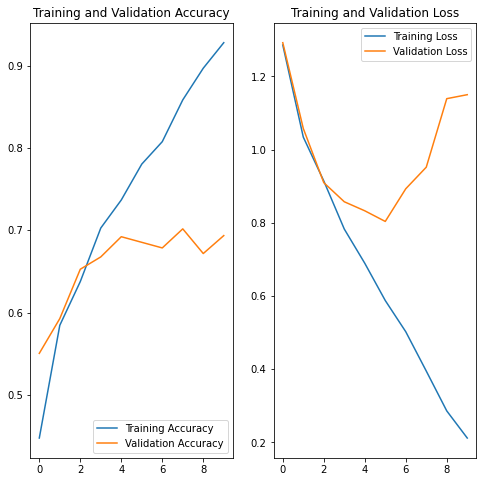

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Extra

16384/7225 [====================================================================] - 0s 0us/step
This image most likely belongs to roses with a 77.85 percent confidence.

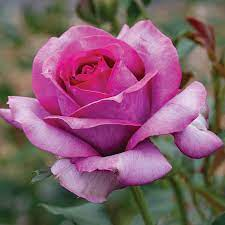

In [ ]:
photo_url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYWFRgWFhYYGRgaGhoYGBgYGBgaGhoaGBgZGRgYGBgcIS4lHB4rIRgYJjgmKy8xNTU1GiQ7QDszPy40NTEBDAwMEA8QHxISHzYrJSg0NDQ2NjY0NDQ0NDQ0NDQ0NDY0NjQ0NDQ0NDE0NDQ0NDQ3NDQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIAOEA4QMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAAEBQMGAAECB//EADwQAAEDAgQDBQcCBQMFAQAAAAEAAhEDBAUSITFBUWEicYGRoQYTMrHB0fBCUhRicpLhI4LxFaKywtIz/8QAGQEAAwEBAQAAAAAAAAAAAAAAAgMEAQAF/8QAKhEAAgICAgEFAAEDBQAAAAAAAAECEQMSITFBBBMiMlFhgaGxFCNScZH/2gAMAwEAAhEDEQA/AAqYlEBi5twiWhFsAuQG4MIQ10bftSTPqhcwnwNaa254CFpVlqu+Qsc1R1nT64XFOpKEFMwpKNMhIlK2ZyNaKGxW6yhSUXFBY7RcQHJu1RDQGdRPNA2tfJU70TQrSEFdUzmDhzS27NlKx1XvIO6LGISxV25edF3SraJUoi9mMbeqXPTOqyBKXYOwl0pniTpYY3TIqkc47FUvLgh8tOydsrCtSg7hV1zCUfg2YHotbpWDF1wSWOGHNJ4J2KCnonRStamRkkrQyMUDCmsyoksCgJXbBtJHBYEOaUlEOXVFvFLlI6kzVCx6KZ9jHBMLQjiia8Qij0ZohE+3QzmFNnlD1WLmzlFC3IsRWRYsN1QWx4RlJwSY1F2yqQmXaEp0w28VbuWwSnb3yEuuaMpExklaBqL0QHoJzCDopGSg2AigprlNSIlLzVXdO41XIJseW9MEo+paNe2CNENglm6p2zLWfu59Gz80+qNaxvYbP9RJVMISaH48TkrKJf4I5hJZqEreCNHBeg1LjQy1vkl9e3pvHaZB5t+x0RP08vA2XopNWio1KQcBCjNi8CYVroYMGklrmuHI9k93L1WXxaGEEQeWyTKMo8SRNLFKLqSoVYJVjQplfgZSkNq+HabL0bBcMAoEvaCXjUEcOAXYouVo6EduDzZtrmMAb/VWvDPZx+STlYI/VM+Q2TjCMAZTeXnUySwcGjh3lNa9Mu0TYYP+QePAl9ip0sNIzQ+Y2EaeahzAKwXVHI2BvzSy5sc8lnxRJHPqOqOeFJfEdkwx12gAOqBQueha8tK4Y+UlIglN9BBeld/dVGat2TWm2dlHWpNPZMLJJBYcriwPC/aGDDx4qwi6a9stKpl/YlhzAaIvCrnWJWI9CcIzjtEfPeVwaiEZVObKUSGrnIjlBxfZvOsW8qxDsZTBqo5KL3pG6O92h7mmIRbULcWzVKtKJbTzJfRpGU0t27IL2GQvycf9PHJbfh08E1pRCOs7Ev7R+H59Aijj2dIbGFvgr1t7LVKgzNytHDMSCe4AbI3BPY1weXXGUMaey0Gc56xwVwtmkDYAcEPdXWXvOkKqOGKYz2lfBJdU4EN2iO4BLKlSJUF3iJGkySgKdckzKeoluPDKrYVWDeJA8CUFUqNG0nyH3TOrDmzA1G3VL6jBK1FGNryRmq2Bo7zH2XNRzHiHgkdeHceC5cCuBGxPgNfNa4pqmP8AajONNWSYVglN1ZpL25G9oyQC6NhCub3To34R68lS2MYdJIPCYj0RdpiD6Z3kbFp28DwS44ox+pFL0MY3o/6MuDGCIUVzUDY5cTw6TyQjMTa9sgxzB3QdTEgDDxpoPnK5Jkntyumg+pbhw+qFFtB69EZbOaR2dBv08lM+mDqPzvW2YpOLoQYhgoqDNo1/Ez2Xf1cj1Cql3amm4h2h/NRzHVX27YSNXR46lVb2sw9z6QezUskOA3yHj1g+hKTkhxa7AzYIyi5LsVUqxLYYlV57xhkgnqn2E2mVg5o2tTZHaCm9vZWyGORRfCKraOfVbv5qJ1q+m6YTR2Euc7NSJb3LHteW5XjUcViTTpnoY8qkiL3suaeeiPBhKGGHBqZvaVj5YjPaqib3q2ho6rF1CNpfgzyhQVWBEFRVULHpqiJjQFO14QBrZSu3VgVqAckPsLp53RwGro9ArADHcOQhJcKqBlJo0l3adPM7SeghNaFQOBPAevcroR1iWwxuMV/JOamkDz/wlF9cZeHcSSfFTXD3TPAcOXckmKXUmJ+0xqmxVss9Pg2lXZA95JlabV5IKtVOwK5fXIEDTmUbpKz1lgVWxi67c0E6eqX3OJPP6iO5A1bocXeqiF8wKaWZPhcAf7cfwKF1OuY95J+anpXB5yPzYoVr87RAGUzOgkiCNxvqkvvn0nls7eRHArllcVT5X6bPNok2uGXelUGhU1y8aRvx9IVfwy7c9vZHGPHc/TzTy5OV0GCeJA8T81RFqSTQiVWpLyDVaz2EFp1+fgj23THtB1aTvOoniEquamigtrjK6D8J3+hWyaVWbkxqUU/KLjhlwW9k6gnQjXZNTcA/ZVixrwPkmVKoT+aaoZRPKyY/lYTcVS4xIACFZUDTpr3dVj5E66ICtWjpzj0XUFCN8EVwzIS0CADp3bhBZS8xwWr+sS4RtARNi1RydSaPJnh1yNP9GFtTDREKK/ogsOmsIgBQ1XaQgY6PHRT2QXjmCmV2+AhL6xc18jY6qG9utWt80hWuGFN2rJ1i1nC2u2QmmN2FbcyVAx0aI2k4IgoxFlzaqFtmU993K6bSC5M72rIS+I6AegT3CWZ2AcyZ2jeNfRVytv8A5THDcVydlxhvAtEeBy7969Vrjg9mcHr8Q65umFvZ6jjw5Kn3NQvLjuB+aqxYnUa5oexxI13nSOnj8lU6dwO0wmCYI5GJ079UO2pT6SoJv9OnO0lC4pc5G9SBH1K3cVhl15wek7LmpTZWguaRlGUtJ3O8yNxrw5JTm2mkUZZtpxi+WDWFFpaHuhxcSBm1AExt4KZ1mGmQBB0yyS1x4EA6iN/BEtt29mB8Pw6u09dfFShgBkboFFVR0MPxSdf9ktvQERtAJO0efiluJWrXxBhw0BidORHFEPeZWMbLu7X7eqJtyWiRs1Ga1fQdhNDJlAghuknnMl3mnNWk17D2iHESDyOv3QFlTEQeX5Pmj7U8JVNVwvBLmaT+Pgrlw8tcWu0I/AR0QVxXjVWbGLBtVhAIDwZY7h/S7+UwqRSpVaj/AHbWkukgjlGhLjwA4lT5nIF53XJb7CsXNaeYB9E8oE5ZOw38ULaUGUaQLiIa0Znnj/SN+4JfXxYvcAwZWN1A4k/ud9k9PbgW47jqtW02/OqW13nvUjKxLYXDwPFElRkFqwG5I0Knt6oG5SvG3ww67kR5pLbVKj3gNMqD1Hxn/Qi9ZiXu2vKRfqdxzW3vlA2z3ZAHbhSMq6pXZFevYsxuuREHUbpOageE0x+nrISq2tHEaJMlyFGaTomlYuPcP5LEGrGfEO/jNUdbXSrTnlHWVdNJIZOS1W9aVKaiW2bweKJq1QFqRXskc1Ahyu8+YSO4964A1XrQdq0ezGSlFNeSS2ushgjsHQj696rvtDZGmczfgcZaRw5CU7rBaqvBaWOEsI1ETE8QuyY1JHV/cSD/AFaRLYDtDykh0EfNcstnxLoEcRqfTZadbOonTVhMtPQ8PmmHvw4NIgabjQqf2VPvhobB39u/7A1JoHM95n02RDNVsOHFrT4Ef+JC2HM/afB0DyIPzWww6vkfGVdETwuqXP8ANF29jTs4j+oaebZPote7IMSCOYP4UxKpcGK1K2gllSOP5zRFO5HMD89VBb27qhyMbnI3I4dXO2A70b7hlBwDxncACY+EE6ANB37ynOifJKLdeQuhbOeJ+EH9R+Y5osWtOmC+GiYL3/qdA0zHillXGnHVrB3u+w+6Cubl7wS8yY0GwHcB0Qat9idX5AsfxE1HgCQxvwt/9iOa1ZkTrxS2+3TCyOuyHGvkwr5pDpmwWn/nVS0yA3WPJBXN0Nhv+bJhkE2xJjr5c1g3mY9B8yn/ALLez7iM5G+7voOZR2DezJqOD6jA0DjHbd0ngOv/ACr5b2zWNAa0AAQBGkdyjnj2ns+jzvUzTyN3Yl/6VTy5SwEc9c39wVaxbDTSeC0ksOxO4P7Sr7c6cAkGMNzMcCIA1HeP+StlBOPAhwU0U3EGSJKHwx2pRmKMhhSuxcchPNefJtSsS40M/eNW0FlK2u3kYA29q57wxglzjDR1+i9gpUWgDMTmgB2uhIGqpLPY95Ay1aZn+ofRPbUvotZSflljQJaSQQBodeKtwwcbtDsWPW0h2+2Yd2tPe0fUJfdYbRO9JngMp9Eyt35hpooL5joJ+idSfZq7oq19h9JjXe7lrv2kktMcNdQVX3V0/wARfKrt4yO00GOI+qdH4x4R63pJRjHVnL3yiqBOQEHmCDzB+yVCsjsOrzmb4j5H6LY5E+B+VquDVwYJaRLTu36jkUvezIdDLTsfoeqaVQDr37cEP7md4DeJdt3DiT0C2atWclaIWPlG0bN7hmgNb+95DGeDnRPhKHpVGU/gbmP73wf7WfCPGSuK9y57sz3FztpJnw6DohjJ0dtJBj6dJnxPLzxbT7LR/ve3Xwb4qahiNBpn+Ga7+uo5/wD2ubl9EplbYOa3VPsGUm1Vv/0umHe09Nzcjmil5Zf7gB6gJNiF2H1DHw8Dz4z5ylHu5iCii2RAkkx3QOC2MUnYqMEna8nWXQ9/zW6g38fQBStGVvzQ1R+h6ymIJsUX40nqjLMIO5dIjqPmjrWm5zg1ok9PmeiUq2bAUubGDqhJDWiTyGydYPhDGuDnkOfuBpDe4Hc9UdhWCBrZdJcRqY+ScstQ0CBpy/wslJdIny+pVax6/wAhdszaUa0aJM2prI0+XiimXR2P54pTRBJEl60Qq9ft7PQkcu/TyTq5uGmBKQ4lVbkPDlr+a/ZY+uQ06jX6I8aYPdnuVZsHkiE9xh5czTiEjsAoMq5olV00/Ax1WLc9Vi3VGDezxAtOV5jkZ3TRtwHvbx4c1Vq7w4QUNSvMjgSSY2MkEeSrxZoyVS4Zfjyxlw+z1m2ZA5LdwZGyqOFY+50NcQ7kTuOk8fFOqeIT1PSE1p2C8bXIuxWxLpLRrxEb93VVwgAkOe1kfuMeg1KvjHh3I+vqkXtDhDajc0Q4bEcuRRqTqh2HKr1ZVqlhbOM/xIE8mP8AllK7tMJYXA0rlrjqMpbq7uDi0nyKVXtk9kyJHMIBlzlMH/KX1K2i18dMuDsIqR2chO2uYDxABlL7rBrn4izNyykbcgNITDAseLyGPdJPwu5/yu5nkfw2kXLQIjuB4BFK5di3nlHijzr+Ar8aTlEbd43Y7yXoFas10ho200iEvruptEvexvQuE/27rY8GrI39ioe7eP0nyXbZ4td5FOKuKURsHv6wGjwkz6IZ+LsOnuj/AHj/AOEaYW0QDjxjuKnpVORWn4i39jv7x/8AK5OKMGpz92Vp9ZCLZINOP6FUagdKBuavDitnEKJ4ub/t0/7SSo2UhWdlpvk7nsuAA57eizdeGZNcWmiKytn1XhrROvgO9eiYJhzKYiBmO55/4S3BbJlNuVvHUk7nqn1Mx1S2yPI21QyYQNPzwXL6o5x4oJ1TrHih7m4PNCkT+3YRcXQH+Pqlt3iWX/KAuLveETh2F/xBlzgGcd5d/KD9UdJK2OWOMVtLoIwV77h+cD/Tae07XKSP0jm75eUrva62dS7TZLXGABJg8ArfSc6kGsDQ1oENA+GByCWe0MOpk8JHgZ0PmkyqRJLJtNNLgpF9X7AHQT5IDDKeYqKteZi4ciR6orAnAEyoMjuQvEu7Gf8ACt6rETnHMLFw6kI7lKqsyntehKWXFArmIdpkNs9zCC0xBB8ldbC6LgHN0B1+4lUlrU7wS9yHK74Tt0P2VGDLT1fTKceVRdS6Ze7R/DzRFcSPz0Sq3uUaytP1VbRsotMW3ViDOiq+J4I1xMD871e3N4IG5pDkjT8MbDI1weZVrJ7NtQOHFTUcXedC94PGXu+6uF3aAjaZn/JVaxHCxy8eO67X8HJt9ELapPE+ZXTWg+KWPY9n8zfUd4RFvdNPfwXKXhm7eGFtZot5dQVjawIUT6m6I0xwnVA3KmqXESldatJ+SVOSSBlJJEtCk57so8TyHNXTCLVtNoDe8niTz70nwu1DGji4k5vCERdY2ymS0AvcOAOgPCStjFRjs+2NS1jcn2WuhXAM8uOykdijGgjOyRwzCe5ecC9qPeHVCXNn4Y0APEDp5p9Z2DZD26g6gpM8ji+iHPnUHwuCynFGcz4Nd9klxX2iLIHu3uk9kkgNPiJ1U1a2MaJfiDP9Nwd0PdBBlAs0tqoVD1dySrs6tsQfUI7AaDvudFc8KqZQBy/PBUnBBrwiJ9VabapBEbKvwU5U2WZtQOEO2Pz6HcFRVLBpY5mdxDgQQ8zoeTt0vbcR3cVO660S3Ek1dlNxb2ONOXUS53HI4yT/AEu+/mqzaMcHTqOYOh8QvU3Xw2Oyr2N2lN/bb8Y3j9Q5nqkTwL7I7JjlrcSue8d+5Yi8jf2/JbU9/wAEVzGgoiEJcUAV2LrSJUT6yV2UykhZUoQV2ympKj1phRdCHJyD7W5ewQDI5H6JnbYozj2T1HnqFXzVhdsqAp0c8o8dofjzSitXyXBlwCNDPUELmq8bceP2CqjHuYZa4jnHHwTJl0cszmPIAzHAyJ5eiqhljL+CqEoy/gYV9kuq0QZ2/OaFucYj4mVB1yoepjLQPhcfJOT/AArguOGcXlpue9Vu8tCDmboeXP8AyrKL/PoKb/MepnRbODvfvlHmfsukrQySi48sqVC8I0P4Vj7s8E7u/Y+s4yxzZ6y3TruiLP2DqO+Os0cwxpdH+5xHySrkuCSU5RddlTfWXeG0i+oAAXRrABJ6aDqvR8O9hrZpGZrnmd3u/wDVsDzCstHC2MGRjGsA2DWgDyGiHVt8sVs9k5HnrrOuGw1hE/qMaDoJ3QlPB3N3b3k8+Mr06pbDlx+hQz7IOG25/PWU+15Hv1G3ZQm4ci7XPTOurOI5dQrOMOgbBbfhw5LpKMlTAm4zVMXMqhc1mNI1Q+K2D6UPZqz9Q5dR0Q4uszeqib1lTPMnjcGLnj3D4B7DpyHkeLT9OncU2ssRn5oG5gsIcJBStudmrDmHImHeB2KfDKumXYfUxktZd/pcqd+NdfyFr/qPOFVad1UEf6b+/KT8lFd3VRoktyg8CdfIJkpxStse5wXlFhvsXbEz/wApHc4o92kwPU96gpUpZncdUM4SpcvqG+IillUk0uhj7x37ltAZHdVimti6HAYZU/u1prwpS8QhqiWkCvCHDyi6jghHOXGcIic9SWr4Ouyyixrg7snNEjWfCAN/NcZX8Q0JkY2jE+Sx4VZ++OkFrfiI+XerM+1aBlA0H5J8lW/ZLGGMD6bzAkua8/DMCWk8DpPmrA6tngjY7dRzA5KvEoxXBTDnkVYpZB7C3ntHnPcq4zDS18POadjEeG5V5bQB32Pr3pTiFrqHcW6jTlwPf9E+LKcOXV89A9lSa3lvGkJhQYBqfnx+yQtvnjQNaQDuZknjsdlu+xZ7hDAGaQXfEesSIHkuckNlOLfZamOAHDVdBwA1MbrzuncV2NgVnwTMEg7mTqRK03ErgEZqmcDg9rHesSPNBaAWv6eqWmQmZBMTpHyXdxUE968vtcXqtqsIkDY6mDO4jlqN+Xiroy/kAk7fb/lZHlipRt2MHVJ/O9SSlVOvOsxxU3vx8kyjHEPMLMw4oR1wFB/FCN/HqF1AqLDK4aRDhIOneqVjNp7p4gyx0lp7tweokJviWNMYN5PIb8VU7y/dUfLu4NHBTepcUq8i8yWtPsluqktgIVvVde8LTqN1FXaTqFJGRLq0PbN4yJFjFYOdCNsmPyJLc0XNqdriUyTtBwjFW75DM/YARuG4eXGSNFDbsDnAcFaaDQ1mnJIVspjSVAn8CFtZ/EjmsWh3EQG4XX8UgiVE98J2p5ykxl79RF8mJ8eXVL/fFYHlA4hbD81abey0E+mvWVrJm3GnL7pbaFN6L0yLbMNBwbGggbDgm+FXxc4yZMjWdtIAjgNEmuCECy+fTdmYYPXUHoQmRVMZjyavno9LY6QoLqlPj/wkeCe0jHwx3ZfwaToT/IePdv3qwe+BGn55p6ZUq7XQju7UNS+pQ4cPnxTm9eHHKPFL65kwI5LGzRU+nuUHUZGp8fJN6jUqv3gaITUD062Ul0cNvt5Iu3xY7TpzSt9B7thA6kD03XAsXDVzh3N+rl0cij2as8Y9lro4k3n6rt2KN56fbgqcGw6DMHqVO6gC0EDbfU/Vd/qo3VGS9VCrSZY6uPsbpmnuS6tiz3gwcreHP7D1S1tsDsp6dqUE80n9eCafqm/qqIxb5pcXEnqhmVDTfrsmdC3cEPidppKkqTbsVvb5D25ampQIaQ4g7SswqvwR11T0lCk1yEpWtQu2IywlWNU4IK6p3cLm5fnG6N5L4AUXF2bt64gRzTd9z2Ehow1E1qphdF0gnyyfMsS335WItGZybyqKpRlSteF1n1TAaIm2sLl1JMANEPW0C5o5qgag+NEwp1UrYQTqYCY29pnHYfryKGLoxNnVaql1YyjKtq8cEM+k4bgo9jGwF0p5gvtA+n2XnMwDjOYdGmNe46dQlv8ADuOwPkibfDXn9JXKTXQcZuLtFltsVpVPgJa8/pcInuOx81M5ms8/ok1DCf3GO5NWOLRGYn+rX13TYyT+yKI+pj1JGnUnapJVZ2yXjbQD6pjd3zwCA4Cemvhqkbq5J1JJ5kygnJLo6WVSVRC31ELUqKF9VRe8lIlIncaJK7ZbPJT2rp8R6rmjqIK4odl0eSUzl0MqVGEQwrhmoClZRVMacbFsmY4KC/EtRLKUKO4AhdLrgKLSfJXLTsvVje3MzwVeuW5Xym9hVJEFKi/AyMb5QJbsBzA81FVoluo2U7qRa88iiK1PToh0tMNNpgDAHd63UDgua1PKdF1SueDkC4Z0o+Yg8nksR0s5radvIDkSGoVPQqLh1Lou6LFuwtBzKhhD3LimFFgAQd2ifQzXgBDkTQqEGQgi7VEMegMofUMRadH6dVIb2ntmB8FXzUWqTC4wEaYt8FoZXaOAUvveSQta4DeVu2u50nUbhadQ894uKjkLTuDxUvvAUSZwvvWEzqlFRpBViqMBS6+t9CQskrRsXTFjBJRHu1DSCaUacqeTGsGYwrq4okAOhM6NHiuqtHM0jmijC1YDfJFYVNET70pTavymDwTZjZIHNbjk+gWuTXvioK7zMIm4aBohXunYLZW1RuqQvv2bFMMIEhB3jTCmwavGhQw4fIUW/Afe0pEjcKO2eHaHcI4jTVLC0tcSEbu7Ov8AQa/ZDtFBUYIkmFLc3QaCTudgljq2ZC4Jys5T1XBP7xn83otoWeqxFogfcY1qKKnusWIX2aHDZL7tYsRPob4Fp3Uw2WLELBNI3D1ixEhT7DnpWP8A9T3BYsRM5jimu1ixaYdUuKiutltYu8HIRs+I96b2uyxYppdjmHs2XRWLFRH6in2I3/G7vTW1+Mf0rFiVD7BeTd0tU9lixNkd5BsQ2QOHb+KxYk+QsfY9qbIZ2xWLE7wDPtiLFd2oSmsWLAGSLFixaYf/2Q=="
photo_path = tf.keras.utils.get_file('rose6', origin=photo_url)

img = tf.keras.utils.load_img(
    photo_path, target_size=img_size
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)